# Fashion mnist using simple sequential

In [1]:
import tensorflow.compat.v2 as tf

import matplotlib.pyplot as plt
import numpy as np

tf.enable_v2_behavior()

## Load raw data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
num_classes = 10

## Visualize data

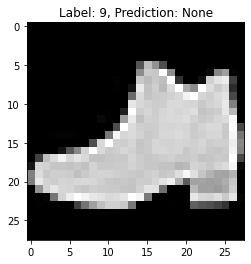

In [3]:
def show_img(x, y, prediction=None):
    plt.imshow(x, cmap='gray')
    plt.title(f"Label: {y}, Prediction: {prediction}")

idx = 15
show_img(x_train[idx], y_train[idx])

## Preprocess data

In [4]:
# shuffle dataset
shuffler = np.random.permutation(len(x_train))
x_train = x_train[shuffler]
y_train = y_train[shuffler]

# normalize images
x_train = x_train / 255.

In [5]:
# shuffle dataset
shuffler = np.random.permutation(len(x_test))
x_test = x_test[shuffler]
y_test = y_test[shuffler]

# normalize images
x_test = x_test / 255.

## Build simple sequential model

In [6]:
input_shape = (28,28)

# note, our objects are `one-hot` which means objects can belong to only one class
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_classes)
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"], # tf.keras.metrics.SparseCategoricalAccuracy()
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
batch_size=128
epochs=15

seq_hist = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
)

Epoch 1/15
422/422 [==============================] - 1s 2ms/step - loss: 0.5632 - accuracy: 0.8061 - val_loss: 0.4356 - val_accuracy: 0.8505
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.4141 - accuracy: 0.8539 - val_loss: 0.3711 - val_accuracy: 0.8680
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3770 - accuracy: 0.8658 - val_loss: 0.3607 - val_accuracy: 0.8730
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3473 - accuracy: 0.8757 - val_loss: 0.3550 - val_accuracy: 0.8768
Epoch 5/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3281 - accuracy: 0.8812 - val_loss: 0.3282 - val_accuracy: 0.8823
Epoch 6/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3116 - accuracy: 0.8874 - val_loss: 0.3903 - val_accuracy: 0.8573
Epoch 7/15
422/422 [==============================] - 1s 2ms/step - loss: 0.2987 - accuracy: 0.8914 - val_loss: 0.3137 - val_accuracy: 0.8890
Epoch 

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.33086270093917847
Test accuracy: 0.8847000002861023


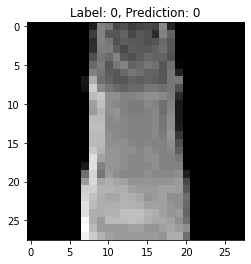

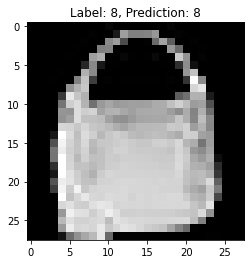

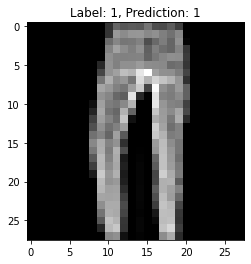

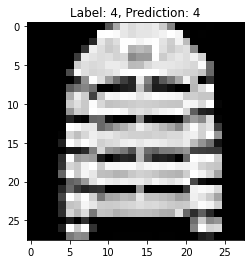

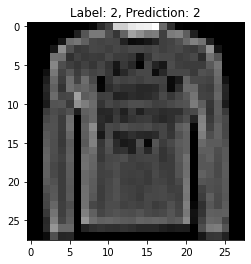

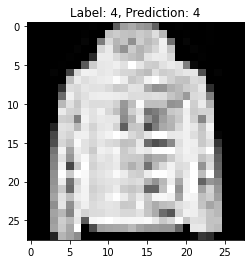

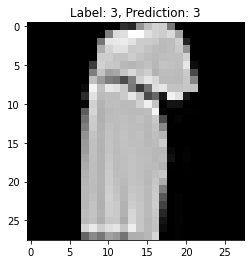

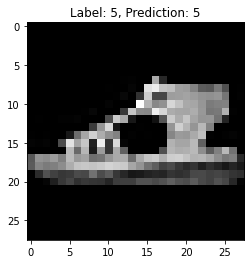

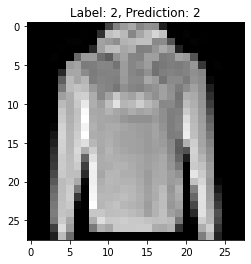

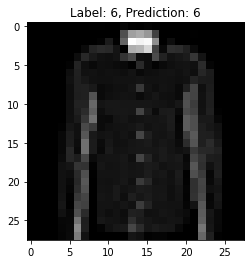

In [9]:
indices = [i for i, x in enumerate(x_test) if i % 1000 == 0]
x = x_test[indices]
y = y_test[indices]

predictions = model.predict(x)
predictions = np.argmax(predictions, axis=1)

for i, pred in enumerate(predictions):
    plt.figure()
    show_img(x[i],y[i],pred)    

## Reload/preprocess data (same as above)

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# shuffle dataset
shuffler = np.random.permutation(len(x_train))
x_train = x_train[shuffler]
y_train = y_train[shuffler]

# normalize images
x_train = x_train / 255.

# shuffle dataset
shuffler = np.random.permutation(len(x_test))
x_test = x_test[shuffler]
y_test = y_test[shuffler]

# normalize images
x_test = x_test / 255.

In [11]:
x_train = np.expand_dims(x_train, -1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

x_test = np.expand_dims(x_test, -1)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

## Build Convolutional Neural Network model

In [12]:
input_shape = (28,28,1)
conv_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax'),
    ]
)

conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [13]:
batch_size = 128
epochs = 15

conv_model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
conv_hist = conv_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 18s 42ms/step - loss: 0.6965 - accuracy: 0.7515 - val_loss: 0.4690 - val_accuracy: 0.8302
Epoch 2/15
422/422 [==============================] - 19s 45ms/step - loss: 0.4476 - accuracy: 0.8386 - val_loss: 0.4081 - val_accuracy: 0.8568
Epoch 3/15
422/422 [==============================] - 19s 44ms/step - loss: 0.3958 - accuracy: 0.8584 - val_loss: 0.3659 - val_accuracy: 0.8740
Epoch 4/15
422/422 [==============================] - 18s 43ms/step - loss: 0.3690 - accuracy: 0.8676 - val_loss: 0.3525 - val_accuracy: 0.8767
Epoch 5/15
422/422 [==============================] - 18s 43ms/step - loss: 0.3505 - accuracy: 0.8735 - val_loss: 0.3269 - val_accuracy: 0.8868
Epoch 6/15
422/422 [==============================] - 18s 43ms/step - loss: 0.3333 - accuracy: 0.8797 - val_loss: 0.3131 - val_accuracy: 0.8897
Epoch 7/15
422/422 [==============================] - 19s 44ms/step - loss: 0.3199 - accuracy: 0.8850 - val_loss: 0.3065 - val_accuracy:

In [14]:
score = conv_model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.26783397793769836
Test accuracy: 0.9023000001907349


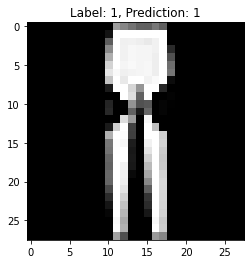

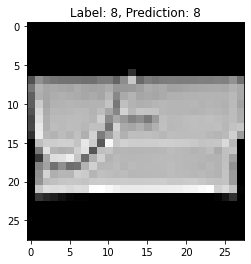

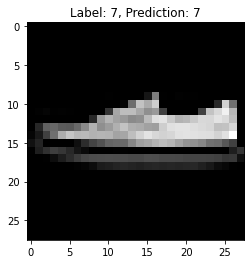

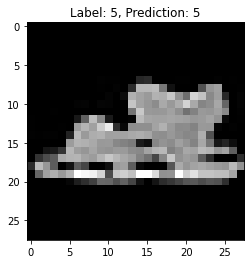

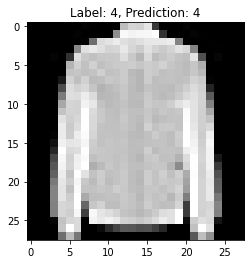

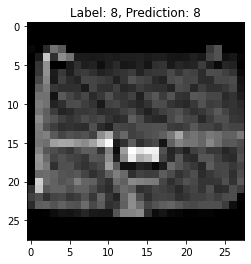

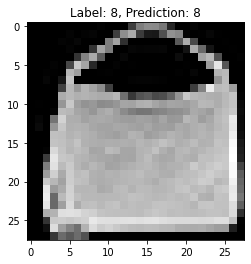

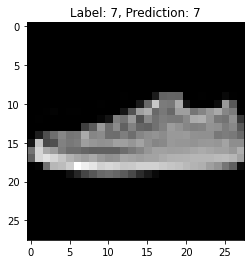

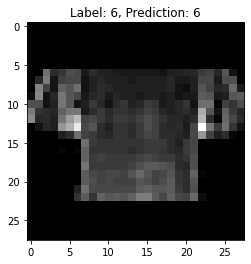

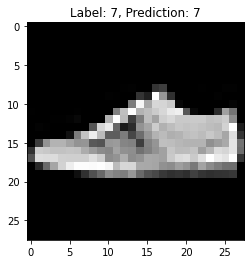

In [15]:
indices = [i for i, x in enumerate(x_test) if i % 1000 == 0]
x = x_test[indices]
y = y_test[indices]

predictions = conv_model.predict(x)
predictions = np.argmax(predictions, axis=1)

for i, pred in enumerate(predictions):
    plt.figure()
    show_img(x[i].reshape(28,28),np.argmax(y[i]),pred)

## Compare results

In [16]:
def plot_accuracy(history, model_name, accuracy='accuracy'):    
    # summarize history for accuracy
    plt.plot(history.history[accuracy])
    plt.plot(history.history[f'val_{accuracy}'])
    plt.title(f'{model_name} model {accuracy}')
    plt.ylabel(accuracy)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def plot_loss(history, model_name):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

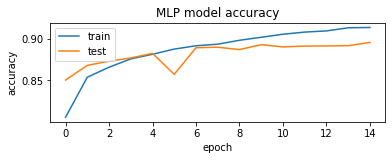

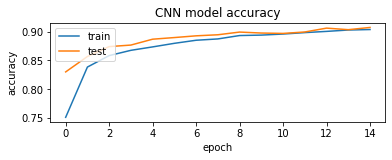

In [18]:
plt.subplot(2,1,1)
plot_accuracy(seq_hist, 'MLP')
plt.subplot(2,1,2)
plot_accuracy(conv_hist, 'CNN')

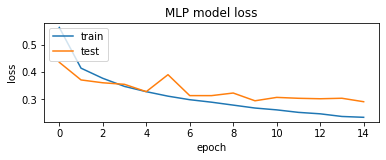

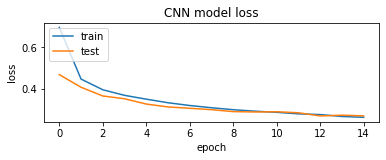

In [19]:
plt.subplot(2,1,2)
plot_loss(seq_hist, 'MLP')
plt.subplot(2,1,1)
plot_loss(conv_hist, 'CNN')

In [23]:
final_MLP_train_acc = seq_hist.history['accuracy'][-1]
final_MLP_val_acc = seq_hist.history['val_accuracy'][-1]
print(f'final MLP accuracy -> train: {final_MLP_train_acc}; val accuracy: {final_MLP_val_acc}')

final MLP accuracy -> train: 0.9132037162780762; val accuracy: 0.8953333497047424


In [24]:
final_CNN_train_acc = conv_hist.history['accuracy'][-1]
final_CNN_val_acc = conv_hist.history['val_accuracy'][-1]
print(f'final CNN accuracy -> train: {final_CNN_train_acc}; val accuracy: {final_CNN_val_acc}')

final CNN accuracy -> train: 0.9035740494728088; val accuracy: 0.9071666598320007
